# Représentation graphique d'une suite mathématique
Nous introduisons la suite $a_n$ définie par :

$$
a_n = \frac{3n-5}{2n+2}
$$

où $a_n$ est un nombre réel et $n$ un entier positif.

Nous pouvons calculer la liste des $N$ premiers éléments de cette suite avec une fonction et une compréhension de liste :

In [6]:
# Nombre de termes
N = 25

# Définition de la fonction F
def F(n):
    ''' Retourne l'élément Sn de la suite '''
    return (3 * n - 5) / (2 * n + 2)

# Liste des éléments
liste_elements = [F(k) for k in range(N)]

print(liste_elements)

[-2.5, -0.5, 0.16666666666666666, 0.5, 0.7, 0.8333333333333334, 0.9285714285714286, 1.0, 1.0555555555555556, 1.1, 1.1363636363636365, 1.1666666666666667, 1.1923076923076923, 1.2142857142857142, 1.2333333333333334, 1.25, 1.2647058823529411, 1.2777777777777777, 1.2894736842105263, 1.3, 1.3095238095238095, 1.3181818181818181, 1.326086956521739, 1.3333333333333333, 1.34]


Dans ce cas, la suite n'est qu'une version discrète de la fonction `F`. Nous pouvons représenter sur un même graphique les éléments de la suite et la fonction :

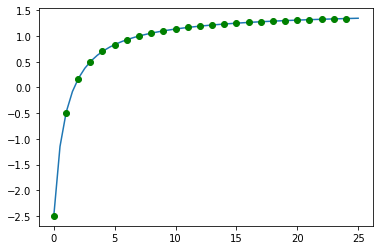

In [5]:
# Import des modules
import numpy as np
import matplotlib.pyplot as plt

# Tracé de la fonction
x = np.linspace(0, N)
plt.plot(x, F(x))

# Tracé des éléments de la suite
plt.plot(range(N), liste_elements, 'og')
plt.show()

Pour illustrer la façon donc chaque élément est calculé, on peut relier l'argument de la fonction et son image par un segment :

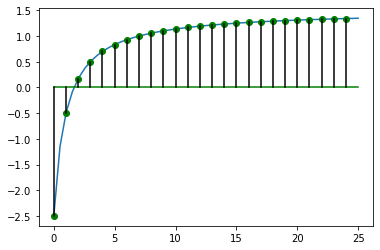

In [7]:
# Tracé de la fonction
x = np.linspace(0, N)
plt.plot(x, F(x))

# Tracé des éléments de la suite
plt.plot(range(N), liste_elements, 'og')

# Tracé de la ligne y = 0
plt.plot([0, N], [0, 0], 'g')

# Tracé des segments
for k in range(N):
    plt.plot([k, k], [0, F(k)], 'k')

plt.show()

Un peu plus intéressant, introduisons maintenant la suite $u_n$ définie par récurrence :

$$
u_{n+1} = u_n - \ln{u_n}
$$

Une écriture équivalente est :

$$
u_{n+1} = G(u_n), \ \text{avec} \ G(x) = x - \ln{x}
$$

Ainsi, le terme $n+1$ est trouvé en prenant l'image par la fonction $G$ du terme $n$. Supposons que $u_0=10$, on peut alors calculer $u_1$ :

In [8]:
# Initialisation de la suite
u0 = 10

# Définition de la fonction G
def G(x):
    return x - np.log(x)

# Calcul des termes suivants
u1 = G(u0)
u2 = G(u1)

# Affichage
print(u1)
print(u2)

7.697414907005954
5.656530360877891


On peut illustrer cela sur le graphique suivant. D'abord, on trace la bissectrice $y=x$ et la fonction $G$. Ensuite, pour trouver $u_1$ :

1. on place le point $U_0 \ (x=u_0, y=u_0)$ sur la bissectrice
2. on place le point $U_{01} \ (x=u_0, y=G(u_0)=u_1)$ sur la fonction $G$ en traçant une ligne verticale depuis le point $U_0$

Pour trouver le point suivant :

3. on place le point $U_1 \ (x=u_1, y=u_1)$ sur la bissectrice en traçant une ligne horizontale depuis le point $U_{01}$
4. on place le point $U_{12} \ (x=u_1, y=G(u_1)=u_2)$ sur la fonction $G$ en traçant une ligne verticale depuis le point $U_1$

et ainsi de suite ...

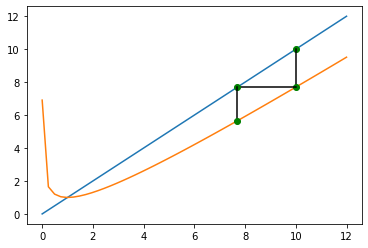

In [18]:
# Limites des abscisses
xb = 1e-3
xe = 12

# Tracé de la bissectrice et de la fonction G
x = np.linspace(xb, xe)
plt.plot(x, x)
plt.plot(x, G(x))

# Étape 1 : point U0
plt.plot([u0], [u0], 'og')

# Étape 2 : image du point U0 avec une ligne 
#   verticale -> U_01
u1 = G(u0)
plt.plot([u0, u0], [u0, u1], 'k')
plt.plot([u0], [u1], 'og')

# Étape 3 : placer le point U1 sur la bissectrice 
#   avec une ligne horizontale depuis U_01
plt.plot([u0, u1], [u1, u1], 'k')
plt.plot([u1], [u1], 'og')

# Étape 4 : image du point U1 avec une ligne 
#   verticale -> U_12
u2 = G(u1)
plt.plot([u1, u1], [u1, u2], 'k')
plt.plot([u1], [u2], 'og')

plt.show()

On voit que cette visualisation peut se généraliser à N points avec une boucle `for` :

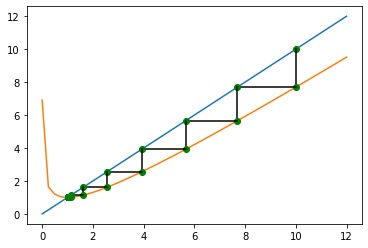

In [19]:
# Limites des abscisses et nombre de récurrence
xb = 1e-3
xe = 12
N = 10

# Tracé de la bissectrice et de la fonction G
x = np.linspace(xb, xe)
plt.plot(x, x)
plt.plot(x, G(x))

# Initialisation
plt.plot([u0], [u0], 'og')

# Récurrence
for k in range(N):
    # Étape 2 : image du point U0 avec une ligne 
    #   verticale -> U_01
    u1 = G(u0)
    plt.plot([u0, u0], [u0, u1], 'k')
    plt.plot([u0], [u1], 'og')
    # Étape 3 : placer le point U1 sur la bissectrice 
    #   avec une ligne horizontale depuis U_01
    plt.plot([u0, u1], [u1, u1], 'k')
    plt.plot([u1], [u1], 'og')
    # Récurrence :
    u0 = u1

On voit que la suite tend vers une limite finie.